# Classificação usando Árvore de Decisão


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bibliotecas e referências usadas

- scikit-learn
  - sklearn.tree
    - [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - [Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)
  - sklearn.model_selection
    - train_test_split
    - [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
  - sklearn.metrics
    - accuracy_score
    - [precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)
    - [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    - confusion_matrix
    - [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
- pandas
- numpy
- matplotlib

## Importando dependências

In [2]:
from google.colab import files
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import unique
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importando os datasets

### Dataset de treinamento: avila-tr.txt

In [3]:
# labels das features
labels = ["intercolumnar distance","upper margin","lower margin","exploitation","row number","modular ratio","interlinear spacing","weight","peak number","modular ratio/ interlinear spacing","Class"]
# labels das classes
classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "W", "X", "Y"]

path_dataset_train = "/content/drive/MyDrive/Disciplinas/2022.2/AM-GRAD 2022-2/Projeto AM 2022-2/data/avila-tr.txt"

avila_train = pd.read_csv(path_dataset_train, sep=",",header=None,names=labels)
avila_train.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


### Dataset de teste: avila-ts.txt

In [4]:
path_dataset_test = "/content/drive/MyDrive/Disciplinas/2022.2/AM-GRAD 2022-2/Projeto AM 2022-2/data/avila-ts.txt"

avila_test = pd.read_csv(path_dataset_test, sep=",",header=None,names=labels)
avila_test.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


## Setando a seed do gerador de números aleatórios

Dessa forma os resultados obtidos pelo modelo não serão diferentes para diferentes sessões

In [5]:
SEED = 32642
np.random.seed(SEED)

## Dividindo dataset de treinamento e teste em: features e classes

In [6]:
# Features de treinamento
X_train = avila_train.drop(['Class'], axis = 1)

# Classes de treinamento
y_train = avila_train['Class']

print("Dataset de treinamento")
print("Tamanho do dataset de features = ", X_train.shape)
print("Tamanho do dataset de classes = ", y_train.shape)

Dataset de treinamento
Tamanho do dataset de features =  (10430, 10)
Tamanho do dataset de classes =  (10430,)


In [7]:
# Features de teste
X_test = avila_test.drop(['Class'], axis = 1)

# Classes de teste
y_test = avila_test['Class']

print("Dataset de teste")
print("Tamanho do dataset de features = ", X_test.shape)
print("Tamanho do dataset de classes = ", y_test.shape)

Dataset de teste
Tamanho do dataset de features =  (10437, 10)
Tamanho do dataset de classes =  (10437,)


## Modelo padrão de árvore de decisão

Treinaremos o modelo usando o parâmetro de random_state com o valor da SEED.

Após isso, obteremos os resultados preditos do treinamento usando o dataset de teste.

In [8]:
dtc = DecisionTreeClassifier(random_state = SEED)
dtc.fit(X_train, y_train)

predicted = dtc.predict(X_test)
predicted

array(['W', 'A', 'A', ..., 'A', 'F', 'H'], dtype=object)

Obtivemos nosso array de predições, agora, vamos analisar quantos desses resultados nosso modelo acertou.

### Análises

#### Resultados numéricos:

- Para cada classe:
  - Precisão
  - Recall
  - F1 Score
- Acurácia
- Médias macro e weighted:
  - Precisão
  - Recall
  - F1 Score

Com o classification_report, comparamos o array de elementos preditos com o array dos elementos reais do dataset de teste.

In [9]:
cr = classification_report(predicted, y_test, digits=4)

print(f'Classification report: \n{cr}')

Classification report: 
              precision    recall  f1-score   support

           A     0.9809    0.9800    0.9804      4290
           B     1.0000    1.0000    1.0000         5
           C     0.9806    0.9528    0.9665       106
           D     0.9717    0.9608    0.9662       357
           E     0.9443    0.9478    0.9460      1091
           F     0.9745    0.9795    0.9770      1952
           G     0.9620    0.9685    0.9652       444
           H     0.9635    0.9364    0.9498       535
           I     0.9832    0.9855    0.9844       830
           W     0.9556    0.8431    0.8958        51
           X     0.9176    0.9283    0.9229       516
           Y     0.9288    0.9538    0.9412       260

    accuracy                         0.9694     10437
   macro avg     0.9635    0.9530    0.9580     10437
weighted avg     0.9695    0.9694    0.9694     10437



Resultados para cada classe:
- Percebemos uma boa média geral nos valores do Precision Score, com todas acima de 0.9, ressaltando o resultado perfeito para a classe "B", que por possuir somente 5 instâncias tanto no dataset de treino quanto no dataset de teste, acabou garantindo esse resultado.
- Para os resultados de Recall Score e F1-Score, os resultados foram semelhantes aos do Precision Score, exceto para a classe "W" que obteve resultados abaixo de 0.9 para o Recall e F1-Score, provavelmente, por uma alta quantidade de Falsos Negativos no cálculo.

Resultados gerais:
- Obtivemos uma acurácia satisfatória de ~0.97.
- Também obtivemos médias macro satisfatórias de Precision = ~0.96, Recall = ~0.95 e F1-Score = ~0.96.

#### Matriz de confusão

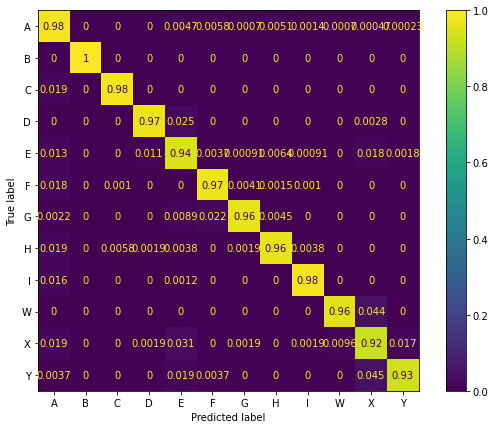

In [10]:
cm = confusion_matrix(y_test, predicted, labels=classes, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)

fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(ax=ax)

plt.show()

Podemos perceber que houve um desempenho relativamente pior em distinguir as classes E, W, X e Y.

## Otimização do modelo usando GridSearchCV


Código de referência: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Parâmetros que atualizaremos no GridSearchCV para o DecisionTreeClassifier:
- criterion: função que mede a qualidade do split dos nós.
  - gini: para a Gini impurity;
  - log_loss e entropy: ambos para o ganho de informação Shannon.
- splitter: estratégia usada para separar cada nó.
  - best: escolhe o melhor split;
  - random: escolhe o melhor split aleatório.
- max_depth: profundidade máxima da árvore.
- max_leaf_nodes: quantidade máxima de folhas.
  - None: ilimitado.
- ccp_alpha: custo de complexidade que permite realizar um método de poda da árvore, o Minimal Cost-Complexity Pruning (post prunning). A sub-árvore com o maior custo de complexidade que é menor que ccp_alpha será escolhida.
  - 0.0: sem poda.
- random_state: controla a aleatoriedade do estimador.
  - Usaremos a nossa Seed setada previamente.

O GridSearchCV também possui integrado um Cross-Validation, através do parâmetro cv.
- Usaremos 5 folds para o Cross-Validation do modelo, assim permitindo com que pelo menos um elemento da classe B fique em cada fold.

In [11]:
dtc = DecisionTreeClassifier()

params = {'criterion':['gini', 'entropy', 'log_loss'], 
          'splitter':['best','random'],
          'max_depth':[None, 2, 5, 10, 15, 20],
          'ccp_alpha':[0.0, 0.0000001, 0.00001, 0.001, 0.01, 0.1, 0.5, 0.75],
          'random_state': [SEED]}

gs_dtc = GridSearchCV(dtc, params, cv=5, refit=True)

Agora, vamos treinar o modelo com o GridSearchCV e após isso pegar os melhores parâmetros.

In [12]:
gs_dtc.fit(X_train, y_train)
gs_dtc.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': None,
 'random_state': 32642,
 'splitter': 'best'}

Agora, vamos treinar um novo modelo de árvore de decisão utilizando os melhores parâmetros obtidos com o GridSearchCV.

In [13]:
best_dtc = DecisionTreeClassifier()
best_dtc.set_params(**gs_dtc.best_params_)
best_dtc.fit(X_train, y_train)

best_predicted = best_dtc.predict(X_test)
best_predicted

array(['W', 'A', 'I', ..., 'A', 'F', 'H'], dtype=object)

Agora, com o array dos resultados preditos com as features de teste para o melhor modelo do GridSearchCV, vamos comparar com os resultados esperados do dataset de teste.

### Análises do melhor modelo do GridSearchCV

#### Resultados numéricos:

- Para cada classe:
  - Precisão
  - Recall
  - F1 Score
- Acurácia
- Médias macro e weighted:
  - Precisão
  - Recall
  - F1 Score

In [14]:
cr = classification_report(best_predicted, y_test, digits=4)

print(f'Classification report: \n{cr}')

Classification report: 
              precision    recall  f1-score   support

           A     0.9944    0.9949    0.9946      4284
           B     1.0000    1.0000    1.0000         5
           C     0.9806    0.9712    0.9758       104
           D     0.9688    0.9942    0.9813       344
           E     0.9781    0.9649    0.9714      1110
           F     0.9975    0.9924    0.9949      1972
           G     0.9508    0.9907    0.9703       429
           H     0.9788    0.9770    0.9779       521
           I     0.9988    1.0000    0.9994       831
           W     1.0000    0.9574    0.9783        47
           X     0.9579    0.9470    0.9524       528
           Y     0.9700    0.9885    0.9792       262

    accuracy                         0.9875     10437
   macro avg     0.9813    0.9815    0.9813     10437
weighted avg     0.9876    0.9875    0.9875     10437



Comparando resultados dos modelos Pré e Pós GridSearchCV.

---

Resultados para cada classe:
- Houve uma melhora satisfatória nos resultados de ambos Precision, Recall e F1-Score.
- A classe I no modelo otimizado pelo gridsearch acabou com 100% de acerto no teste para o Recall.
- A classe W que no modelo pré-gridsearch tinha resultados abaixo de 0.9 para o Recall e F1-Score, agora possui em todos os scores resultados acima de 0.9. E com a ressalva de que conseguiu 100% de acerto no teste para o Precision Score.
- A classe X agora ocupa o papel da classe com os menores scores, ainda que acima de 0.9.

Resultados gerais:
- Obtivemos uma melhora de ~0.97 para ~0.99 na acurácia.
- Os resultados para as médias macro também obtiveram uma melhora de:
  - Precision = ~0.96 para ~0.98;
  - Recall = ~0.95 para ~0.98;
  - F1-Score = ~0.96 para ~0.98.

#### Matriz de confusão

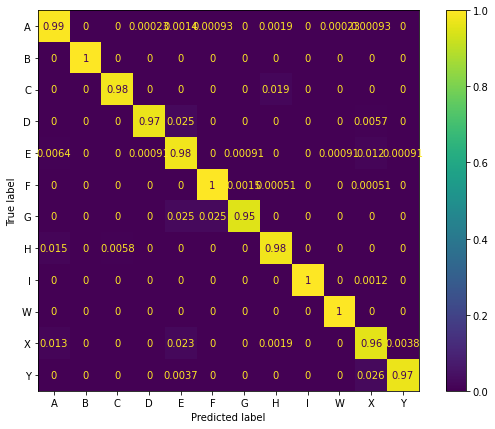

In [15]:
cm = confusion_matrix(y_test, best_predicted, labels=classes, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)

fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(ax=ax)

plt.show()

Podemos perceber visualmente a melhora geral na distinção das classes.